In [1]:
import os
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
DATA = "../data/books/analyze-frame-time/"

In [70]:
fn = "output16.txt"

In [71]:
def loadData(fn):
    with open(DATA + fn, 'r') as f:
        lines = f.readlines()
    print lines[:3]
    lines = lines= [x.strip().split(',') for x in lines]
    print lines[:3]

    var1 = [x[0] for x in lines]
    print var1[:3]
    var1 = [float(x) for x in var1]
    print var1[:3]

    var2 = [x[1] for x in lines]
    var2 = [float(x) for x in var2]
    
    return var1, var2

In [72]:
var1, var2 = loadData("output16.txt")

['0.0329,0.0230\n', '0.0319,0.0239\n', '0.0350,0.0139\n']
[['0.0329', '0.0230'], ['0.0319', '0.0239'], ['0.0350', '0.0139']]
['0.0329', '0.0319', '0.0350']
[0.0329, 0.0319, 0.035]


In [73]:
def plots(var1, var2):
    plt.plot(zip(var1, var2))
    plt.show()
    plt.scatter(var1, var2)
    plt.show()
    plt.hist(var1)
    plt.show()
    plt.hist(var2)
    plt.show()

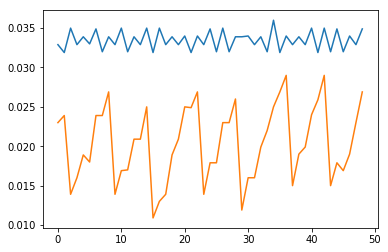

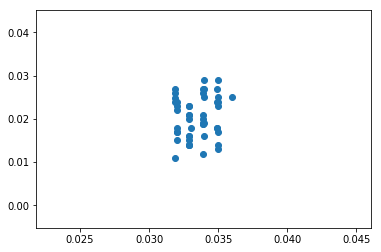

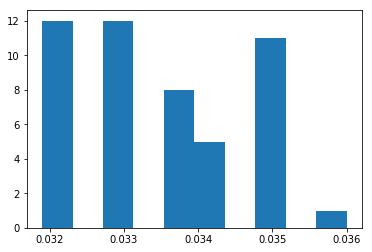

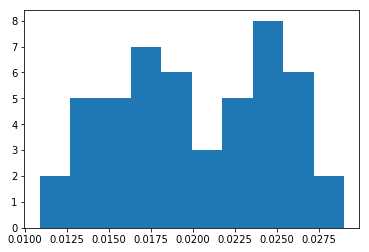

In [74]:
plots(var1, var2)

In [75]:
var1, var2 = loadData("output17.txt")

['0.0339,0.0199,False,True,0\n', '0.0320,0.0209,False,True,0\n', '0.0350,0.0250,False,True,0\n']
[['0.0339', '0.0199', 'False', 'True', '0'], ['0.0320', '0.0209', 'False', 'True', '0'], ['0.0350', '0.0250', 'False', 'True', '0']]
['0.0339', '0.0320', '0.0350']
[0.0339, 0.032, 0.035]


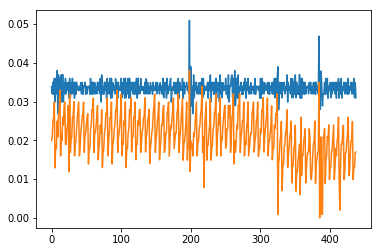

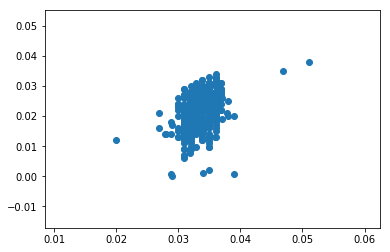

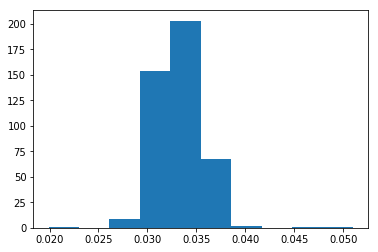

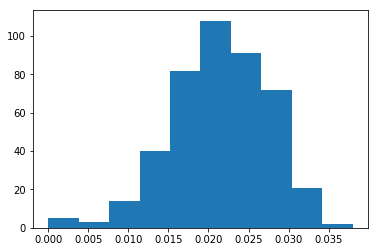

In [76]:
plots(var1, var2)

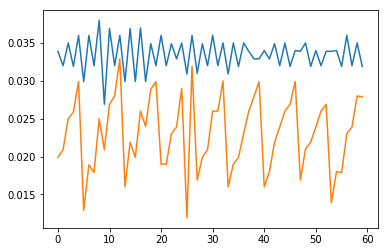

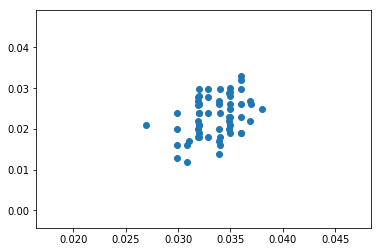

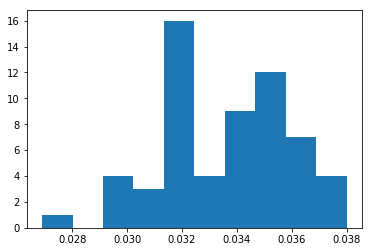

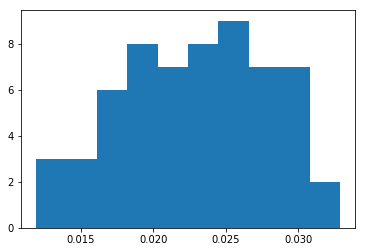

In [27]:
plots(var1[:60], var2[:60])

##### This clearly show that frame read is being used to intentionally slowdown frame capture

['0.0420,0.0060,False,True,2\n', '0.0290,0.0049,False,True,2\n', '0.0309,0.0049,False,True,2\n']
[['0.0420', '0.0060', 'False', 'True', '2'], ['0.0290', '0.0049', 'False', 'True', '2'], ['0.0309', '0.0049', 'False', 'True', '2']]
['0.0420', '0.0290', '0.0309']
[0.042, 0.029, 0.0309]


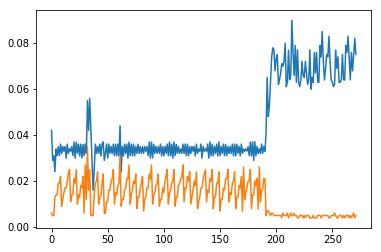

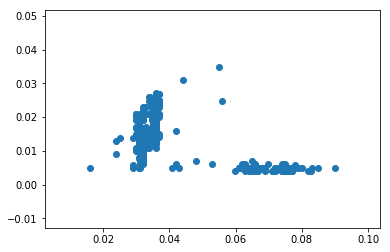

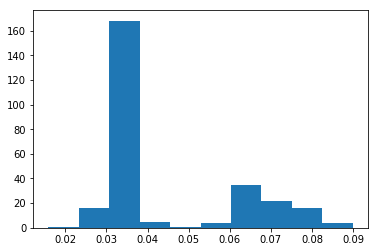

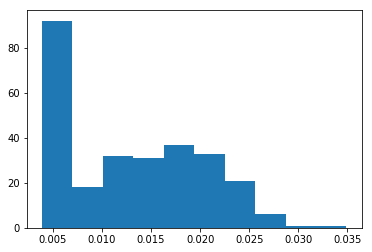

In [77]:
#recording at 1920 without frame buffer, look at jump when record is set ON
var1, var2 = loadData("output18.txt")
plots(var1, var2)

In [32]:
'''
The stats for the above video
-----------
metric:  time-per-frame
file:    output18.txt
skip:    1
filter   recordOn = True
-----------
n:       80
mean:    0.0696
Z +/-  : 0.0679 - 0.0713
min:     0.0480   2.9 sd
max:     0.0899   2.7 sd
sd:      0.0075

-----------
metric:  time-per-frame
file:    output18.txt
skip:    1
filter   recordOn = False
-----------
n:       190
mean:    0.0336
Z +/-  : 0.0330 - 0.0341
min:     0.0159   4.6 sd
max:     0.0559   5.8 sd
sd:      0.0038

'''

'\nThe stats for the above video\n-----------\nmetric:  time-per-frame\nfile:    output18.txt\nskip:    1\nfilter   recordOn = True\n-----------\nn:       80\nmean:    0.0696\nZ +/-  : 0.0679 - 0.0713\nmin:     0.0480   2.9 sd\nmax:     0.0899   2.7 sd\nsd:      0.0075\n\n-----------\nmetric:  time-per-frame\nfile:    output18.txt\nskip:    1\nfilter   recordOn = False\n-----------\nn:       190\nmean:    0.0336\nZ +/-  : 0.0330 - 0.0341\nmin:     0.0159   4.6 sd\nmax:     0.0559   5.8 sd\nsd:      0.0038\n\n'

##### This introduces a schedule of growing intervals of sleep each frame after frame read

In [78]:
def buildSleep(var1):
    domain = range(len(var1))
    c = 0.004
    r = 0.01
    def f(x):
        return  c*((1+r)**x)
    y = [f(x) for x in domain]
    y2 = [max(0, 0.0335 - f(x)) for x in domain]
    return y, y2

['0.0330,0.0160,False,True,0\n', '0.0329,0.0180,False,True,0\n', '0.0339,0.0209,False,True,0\n']
[['0.0330', '0.0160', 'False', 'True', '0'], ['0.0329', '0.0180', 'False', 'True', '0'], ['0.0339', '0.0209', 'False', 'True', '0']]
['0.0330', '0.0329', '0.0339']
[0.033, 0.0329, 0.0339]


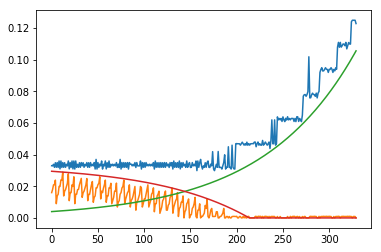

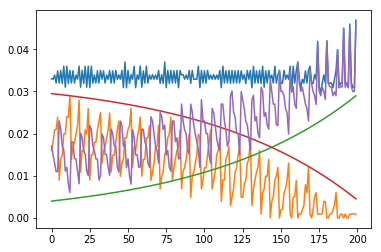

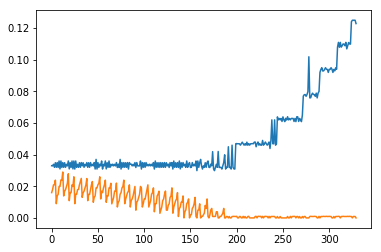

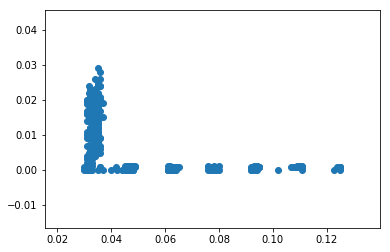

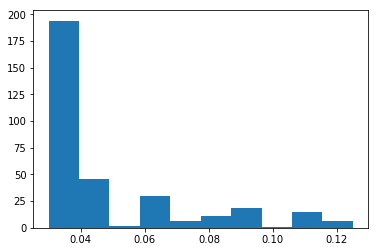

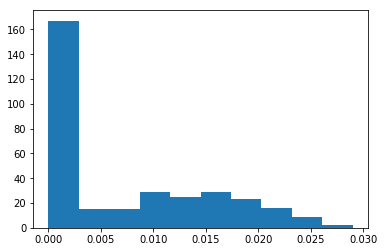

In [79]:
var1, var2 = loadData("output20.txt")

y, y2 = buildSleep(var1)
plt.plot(zip(var1,var2, y, y2))
plt.show()
y3 = [a - b for a,b in zip(var1,var2)]
# print y3
plt.plot(zip(var1[:200],var2[:200], y[:200], y2[:200], y3[:200]))
plt.show()
plots(var1, var2)

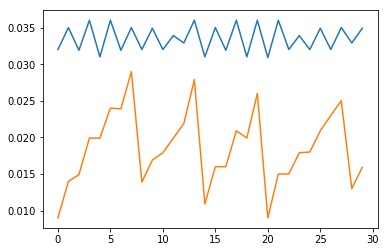

In [80]:
a,x = 5,35
plt.plot(zip(var1[a:x],var2[a:x]))